## Iris Classification with KNN
![3 loài hoa Iris](https://www.pngkey.com/png/detail/82-826789_iris-iris-sepal-and-petal.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.neighbors as neighbors
from sklearn import metrics

### 1. Read data

In [2]:
df = pd.read_csv('data_iris.csv')
# print(type(df)) --> pandas.core.frame.DataFrame

In [3]:
pd.DataFrame(df)

,sepallength,sepalwidth,petallength,petalwidth,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
for i in df.index:
    print(df.index[i], df.name[i])

0 Iris-setosa
1 Iris-setosa
2 Iris-setosa
3 Iris-setosa
4 Iris-setosa
5 Iris-setosa
6 Iris-setosa
7 Iris-setosa
8 Iris-setosa
9 Iris-setosa
10 Iris-setosa
11 Iris-setosa
12 Iris-setosa
13 Iris-setosa
14 Iris-setosa
15 Iris-setosa
16 Iris-setosa
17 Iris-setosa
18 Iris-setosa
19 Iris-setosa
20 Iris-setosa
21 Iris-setosa
22 Iris-setosa
23 Iris-setosa
24 Iris-setosa
25 Iris-setosa
26 Iris-setosa
27 Iris-setosa
28 Iris-setosa
29 Iris-setosa
30 Iris-setosa
31 Iris-setosa
32 Iris-setosa
33 Iris-setosa
34 Iris-setosa
35 Iris-setosa
36 Iris-setosa
37 Iris-setosa
38 Iris-setosa
39 Iris-setosa
40 Iris-setosa
41 Iris-setosa
42 Iris-setosa
43 Iris-setosa
44 Iris-setosa
45 Iris-setosa
46 Iris-setosa
47 Iris-setosa
48 Iris-setosa
49 Iris-setosa
50 Iris-versicolor
51 Iris-versicolor
52 Iris-versicolor
53 Iris-versicolor
54 Iris-versicolor
55 Iris-versicolor
56 Iris-versicolor
57 Iris-versicolor
58 Iris-versicolor
59 Iris-versicolor
60 Iris-versicolor
61 Iris-versicolor
62 Iris-versicolor
63 Iris-versi

In [5]:
print(df.shape)
df.head(5)
df.tail(3)

(150, 5)


,sepallength,sepalwidth,petallength,petalwidth,name
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
X = df.drop(columns=['name'])
Y = df['name']
print(X)
print(Y)

# Y = df.name

     sepallength  sepalwidth  petallength  petalwidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: name, Length: 150, dtype: object


### 2.  Data analysis with visualizations

### 3. KNN train and test

In [31]:
X_train, X_test, Y_train, Y_test = ms.train_test_split(X, Y, test_size=0.1, random_state=123)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


In [33]:
# KNN with n_neighbours = 5
knn5 = neighbors.KNeighborsClassifier(n_neighbors=18) #6,9,15
knn5.fit(X_train, Y_train);

In [34]:
Y_pred = knn5.predict(X_test)
for i in range(0,Y_test.size):
    if Y_test.iloc[i] != Y_pred[i]:
        print(Y_test.index[i], Y_test.iloc[i], Y_pred[i],'---> FALSE')
    else:
        print(Y_test.index[i], Y_test.iloc[i], Y_pred[i])

72 Iris-versicolor Iris-versicolor
112 Iris-virginica Iris-virginica
132 Iris-virginica Iris-virginica
88 Iris-versicolor Iris-versicolor
37 Iris-setosa Iris-setosa
138 Iris-virginica Iris-versicolor ---> FALSE
87 Iris-versicolor Iris-versicolor
42 Iris-setosa Iris-setosa
8 Iris-setosa Iris-setosa
90 Iris-versicolor Iris-versicolor
141 Iris-virginica Iris-virginica
33 Iris-setosa Iris-setosa
59 Iris-versicolor Iris-versicolor
116 Iris-virginica Iris-virginica
135 Iris-virginica Iris-virginica


In [35]:
# Ci,j is equal to the number of observations known 
# to be in group i and predicted to be in group j.
print(metrics.confusion_matrix(Y_test,Y_pred))
print("------------------------")
print( "Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),4)))

[[4 0 0]
 [0 5 0]
 [0 1 5]]
------------------------
Accuracy : 0.9333


### 4. KNN hyperparameter tuning

In [ ]:
# Vẽ đồ thị biễu diễn các điểm dữ liệu của 2 cột bất kỳ

#### 4.1 Manual tuning (điều chỉnh thủ công)

In [36]:
accs = []
k_grid = range(1,50,1)
for k in k_grid:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(Y_test,Y_pred)
    accs.append(score)
    if score == 1: print('Accuracy 100% with k=', k)

Accuracy 100% with k= 15
Accuracy 100% with k= 19
Accuracy 100% with k= 20
Accuracy 100% with k= 23
Accuracy 100% with k= 27


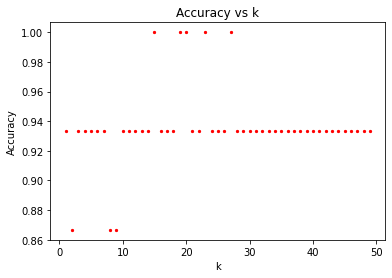

In [37]:
plt.scatter(k_grid,accs,c='red',marker='o',s=5)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

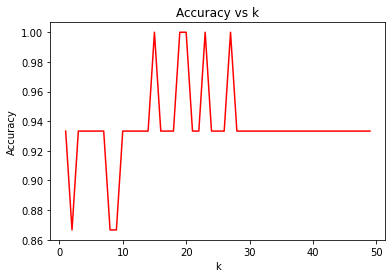

In [38]:
plt.plot(k_grid,accs, color='red')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

 #### 4.2 Tuning k using GridSearchCV

In [ ]:
# Parameter grid.
k_grid = np.arange(1,51,1)
parameters = {'n_neighbors':k_grid}

In [ ]:
# Optimize the k.
# cv (cross validation): n_splits cannot be greater than the number of members in each class
gridCV = ms.GridSearchCV(neighbors.KNeighborsClassifier(), parameters)
gridCV.fit(X_train, Y_train)
best_k = gridCV.best_params_['n_neighbors']
print("Best k : " + str(best_k))

In [ ]:
# Test with the best k.
KNN_best = neighbors.KNeighborsClassifier(n_neighbors=best_k)
KNN_best.fit(X_train, Y_train)
Y_pred = KNN_best.predict(X_test)
print( "Best Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

#### 4.3 Tuning k using BayesSearchCV

In [ ]:
from skopt import BayesSearchCV

#### 4.4 Tuning k using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV